In [ ]:
# Импорт данных (старая версия)
# from google.colab import files
# upload = files.upload()

In [ ]:
# 1. Импорт библиотек и загрузка датасета (старая версия)
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# HW02 = pd.read_csv('S02-hw-dataset.csv')

In [ ]:
# 1. Импорт библиотек и загрузка датасета
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Проверим текущую рабочую директорию
print("Текущая директория:", os.getcwd())

# Относительный путь к файлу от ноутбука HW02.ipynb
file_path = "S02-hw-dataset.csv"

# Загрузка датасета
HW02 = pd.read_csv(file_path)

# Проверим первые строки
HW02.head()

Текущая директория: /content


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [ ]:
# 2. Первичный осмотр данных
print("Первые 5 строк датасета:")
display(HW02.head())

print("\nИнформация о столбцах и типах данных:")
print(HW02.info())

print("\nОписательные статистики для числовых столбцов:")
display(HW02.describe())

Первые 5 строк датасета:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о столбцах и типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

Описательные статистики для числовых столбцов:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [31]:
# 3. Проверка качества данных
# 3.1. Пропуски
print("\nДоля пропусков в столбцах:")
print(HW02.isna().mean())

# 3.2. Дубликаты
print("\nКоличество дублирующихся строк:")
print(HW02.duplicated().sum())

# 3.3. Подозрительные значения
# Возраст
if 'age' in HW02.columns:
    print("\nСтроки с подозрительным возрастом (<0 или >100):")
    display(HW02[(HW02['age'] < 0) | (HW02['age'] > 100)])

# Количество покупок
if 'purchases' in HW02.columns:
    print("\nСтроки с отрицательным количеством покупок:")
    display(HW02[HW02['purchases'] < 0])

# Выручка
if 'revenue' in HW02.columns and 'purchases' in HW02.columns:
    print("\nСтроки с нулевой или отрицательной выручкой при ненулевых покупках:")
    display(HW02[(HW02['revenue'] <= 0) & (HW02['purchases'] > 0)])

# Вывод  по качеству данных
print("\nВывод по качеству данных:")
missing_cols = ", ".join([f"{col} ({HW02[col].isna().mean():.2%})" for col in HW02.columns if HW02[col].isna().mean() > 0])
print(f"- Пропуски обнаружены в столбцах: {missing_cols if missing_cols else 'нет'}")
print(f"- Количество полностью дублирующихся строк: {HW02.duplicated().sum()}")
print(f"- Строки с подозрительным возрастом: {len(HW02[(HW02['age'] < 0) | (HW02['age'] > 100)]) if 'age' in HW02.columns else 0}")
print(f"- Строки с отрицательным количеством покупок: {len(HW02[HW02['purchases'] < 0]) if 'purchases' in HW02.columns else 0}")
print(f"- Строки с нулевой или отрицательной выручкой при ненулевых покупках: {len(HW02[(HW02['revenue'] <= 0) & (HW02['purchases'] > 0)]) if {'revenue','purchases'}.issubset(HW02.columns) else 0}")



Доля пропусков в столбцах:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество дублирующихся строк:
1

Строки с подозрительным возрастом (<0 или >100):


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



Строки с отрицательным количеством покупок:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



Строки с нулевой или отрицательной выручкой при ненулевых покупках:


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0



Вывод по качеству данных:
- Пропуски обнаружены в столбцах: age (4.88%)
- Количество полностью дублирующихся строк: 1
- Строки с подозрительным возрастом: 1
- Строки с отрицательным количеством покупок: 1
- Строки с нулевой или отрицательной выручкой при ненулевых покупках: 1


In [30]:
# 4. Минимальный EDA
# 4.1. Частоты категориальных переменных
cat_cols = HW02.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"\nЧастоты для столбца '{col}':")
    print(HW02[col].value_counts())
    print("-" * 40)

# 4.2. Группировка и агрегаты по категориям
numeric_cols = HW02.select_dtypes(include=np.number).columns.tolist()
for col in cat_cols:
    print(f"\nСредние числовые значения по '{col}':")
    display(HW02.groupby(col)[numeric_cols].mean())

    print(f"\nСуммы числовых значений по '{col}':")
    display(HW02.groupby(col)[numeric_cols].sum())

    print(f"\nКоличество записей по '{col}':")
    display(HW02.groupby(col)[numeric_cols].count())

# Вывод по минимальному EDA
print("\nВывод по минимальному EDA:")
print(f"- В датасете {len(cat_cols)} категориальных столбцов: {', '.join(cat_cols) if cat_cols else 'нет'}")
for col in cat_cols:
    print(f"- Средние значения числовых переменных по '{col}' различаются между категориями")
    print(f"- Суммы числовых переменных по '{col}' различаются между категориями")
    print(f"- Количество записей по категориям '{col}' подсчитано для анализа распределения")


Частоты для столбца 'country':
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
----------------------------------------

Средние числовые значения по 'country':


,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.600000,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.714286,4.625000,557.375000



Суммы числовых значений по 'country':


,user_id,age,purchases,revenue
country,,,,
CN,20,48.0,9,2108
DE,148,173.0,39,8673
FR,248,555.0,51,8111
RU,235,391.0,62,10271
US,179,257.0,37,4459



Количество записей по 'country':


,user_id,age,purchases,revenue
country,,,,
CN,2,2,2,2
DE,6,5,6,6
FR,12,12,12,12
RU,13,13,13,13
US,8,7,8,8



Вывод по минимальному EDA:
- В датасете 1 категориальных столбцов: country
- Средние значения числовых переменных по 'country' различаются между категориями
- Суммы числовых переменных по 'country' различаются между категориями
- Количество записей по категориям 'country' подсчитано для анализа распределения


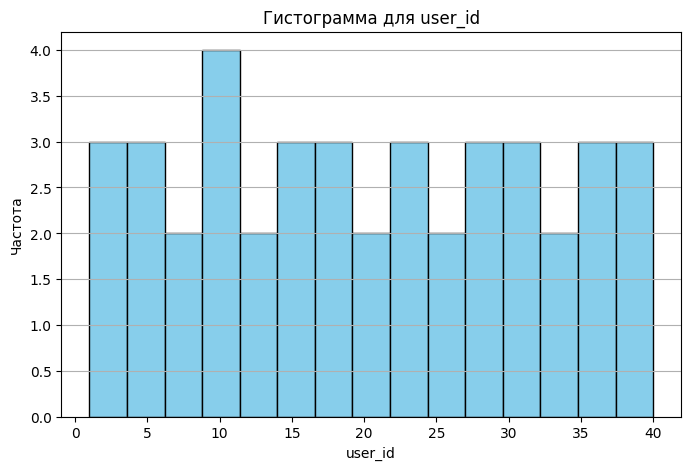

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

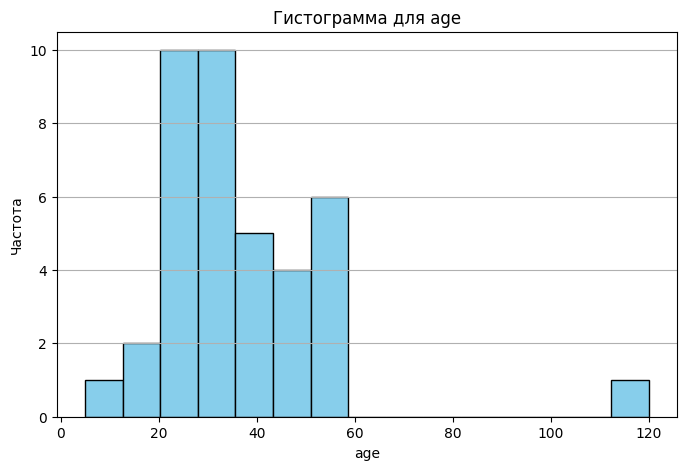

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

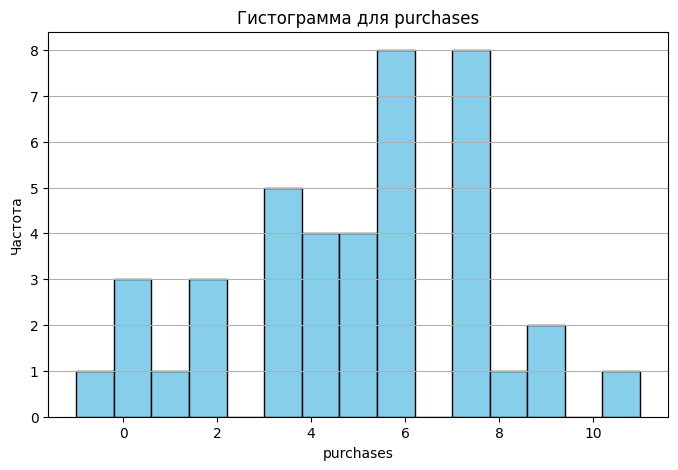

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

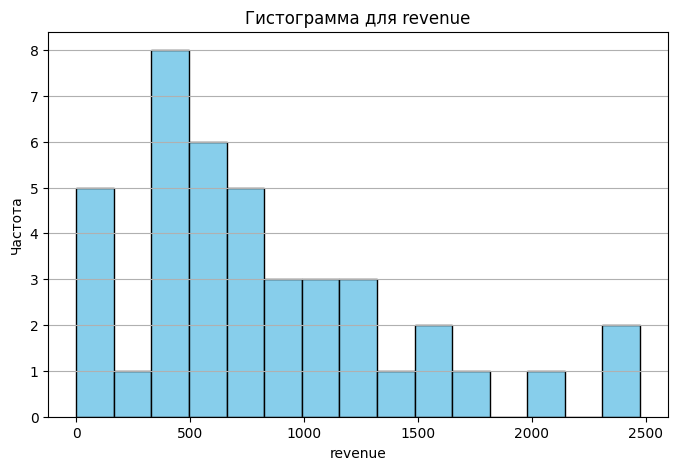

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x500 with 0 Axes>

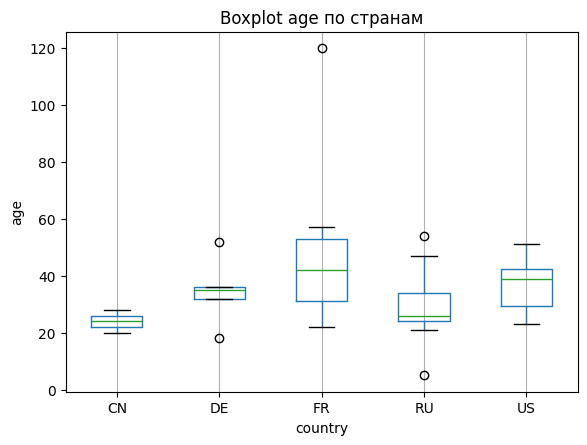

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x500 with 0 Axes>

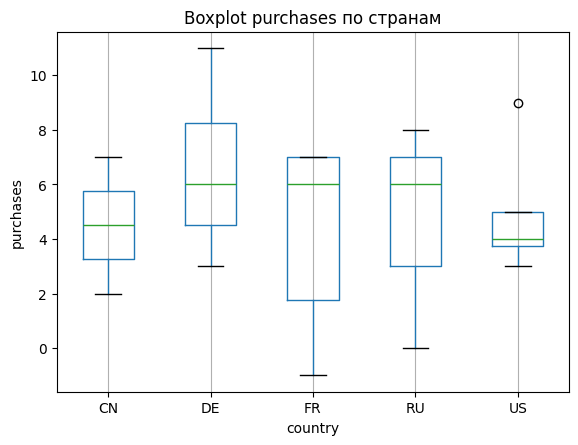

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x500 with 0 Axes>

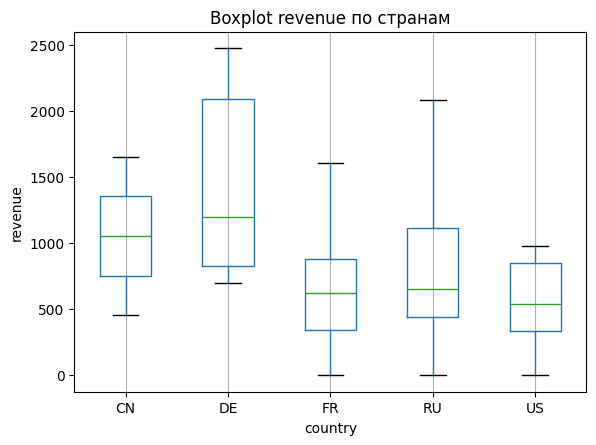

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

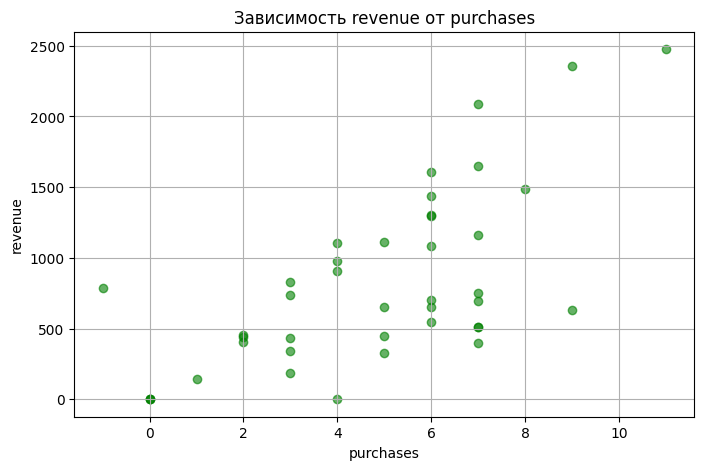

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Визуализация данных и автоскачивание графиков
from google.colab import files

# 1. Гистограммы для всех числовых столбцов
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    plt.hist(HW02[col].dropna(), bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(axis='y')
    file_name = f"hist_{col}.png"
    plt.savefig(file_name)
    plt.show()
    # Скачать график
    files.download(file_name)

# 2. Boxplot по странам для числовых столбцов (кроме user_id)
for col in numeric_cols[1:]:
    plt.figure(figsize=(8,5))
    HW02.boxplot(column=col, by='country')
    plt.title(f'Boxplot {col} по странам')
    plt.suptitle('')
    plt.ylabel(col)
    plt.grid(axis='y')
    file_name = f"boxplot_{col}_by_country.png"
    plt.savefig(file_name)
    plt.show()
    files.download(file_name)

# 3. Scatter plot: purchases vs revenue
plt.figure(figsize=(8,5))
plt.scatter(HW02['purchases'], HW02['revenue'], c='green', alpha=0.6)
plt.title('Зависимость revenue от purchases')
plt.xlabel('purchases')
plt.ylabel('revenue')
plt.grid(True)
file_name = "scatter_purchases_revenue.png"
plt.savefig(file_name)
plt.show()
files.download(file_name)


In [24]:
# 6. Краткие выводы

print("\nВыводы по EDA:")
print(f"- В датасете {len(cat_cols)} категориальных столбцов: {cat_cols}")
print("- Средние и суммарные значения числовых переменных различаются по категориям, что может указывать на различия между странами по покупкам и выручке.")
print("- Гистограммы показывают распределение возрастов, количества покупок и выручки. Можно заметить, что есть отдельные аномальные значения (например, возраст 120 лет или отрицательные покупки).")
print("- Boxplot по странам позволяет визуально сравнить медиану, размах и выбросы по ключевым показателям для каждой страны.")
print("- Диаграмма рассеяния (scatter plot) демонстрирует положительную связь между количеством покупок и выручкой, с отдельными отклонениями.")
print("- Все графики сохраняются в текущей директории, после чего их можно скачать на локальный компьютер для отчета или анализа.")



Выводы по EDA:
- В датасете 1 категориальных столбцов: ['country']
- Средние и суммарные значения числовых переменных различаются по категориям, что может указывать на различия между странами по покупкам и выручке.
- Гистограммы показывают распределение возрастов, количества покупок и выручки. Можно заметить, что есть отдельные аномальные значения (например, возраст 120 лет или отрицательные покупки).
- Boxplot по странам позволяет визуально сравнить медиану, размах и выбросы по ключевым показателям для каждой страны.
- Диаграмма рассеяния (scatter plot) демонстрирует положительную связь между количеством покупок и выручкой, с отдельными отклонениями.
- Все графики сохраняются в текущей директории, после чего их можно скачать на локальный компьютер для отчета или анализа.
